**Summative Lab- DataVine Analytics**

This lab will strengthen your ability to translate theoretical knowledge into a practical application, where you'll need to select, implement, and optimize various machine learning approaches to solve business problems. In this lab you will be using carefully selected datasets that mirror actual retail data structures. Using the complete machine learning workflow—from exploratory data analysis and preprocessing to model implementation, evaluation, and result interpretation. 

**Scenario**

As a junior data scientist at DataVine Analytics, you've been assigned to work with a boutique consulting group that specializes in diverse industry applications of machine learning. Your team serves clients across several sectors, and you've been tasked with developing prototype machine learning solutions using standardized datasets that mirror real-world problems.

Your supervisor has outlined three specific client projects that will test your ability to implement classification, recommendation, and clustering techniques while applying dimensionality reduction and hyper-parameter tuning:

1. **Wine Classification System (Wine Dataset)**

A premium wine distributor needs to automatically classify wines based on their chemical properties for inventory management and quality control.

You'll use k-Nearest Neighbors (k-NN) with PCA to create an accurate classification model that can identify wine varieties from their measurable attributes, optimizing the classification through systematic hyperparameter tuning.

2. **Agricultural Feed Recommendation Engine (Chickwts Dataset)**

An agricultural supply company wants to recommend similar feed types to farmers based on performance data.

Using the chicken weights dataset as a proxy, you'll build a recommendation system that leverages PCA and similarity metrics to suggest comparable feed products that might produce similar results.

3. **Regional Crime Pattern Analysis (USArrests Dataset)**

A public policy research firm requires a data-driven approach to identify patterns in crime statistics across different regions.

You'll apply clustering techniques (both K-Means and Gaussian Mixture Models) to discover natural groupings in crime data, using feature selection and dimensionality reduction to focus on the most relevant patterns.

**Step 1: Load and Prepare Datasets**

Ensure datasets are accessible, cleaned, and formatted correctly for machine learning applications.

1. Load the Wine, Chickwts, and USArrests datasets.
2. Inspect the data for missing values and handle inconsistencies.
3. Standardize numerical features to improve model performance.
4. Summarize the datasets to confirm their structure.

In [31]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime

In [32]:
#load dataset
df_arrests = pd.read_csv('arrests_data.csv')
df_chickwts = pd.read_csv('chickwts_data.csv')
df_wine = pd.read_csv('wine_data.csv')

In [33]:
#Inspect the data for df_arrests,df_chickwits and df_wine for missing values and handle inconsistencies.
print("Arrests Data Missing Values:\n\n", df_arrests.isnull().sum())

Arrests Data Missing Values:

 Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [34]:
print("Chickwts Data Missing Values:\n\n", df_chickwts.isnull().sum())

Chickwts Data Missing Values:

 feed_name              0
proteinContent         0
fatContent             0
fiberContent           0
calciumContent         0
phosphorusContent      0
moistureContent        0
ashContent             0
metabolizableEnergy    0
lysineContent          0
methionineContent      0
particleSize           0
density                0
price                  0
shelfLife              0
weight                 0
dtype: int64


In [35]:
print("Wine Data Missing Values:\n", df_wine.isnull().sum())

Wine Data Missing Values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [36]:
#Standardize numerical features to improve model performance.
scaler = StandardScaler()
df_arrests_scaled = scaler.fit_transform(df_arrests.select_dtypes(include=[np.number]))
df_chickwits_scaled = scaler.fit_transform(df_chickwts.select_dtypes(include=[np.number]))
df_wine_scaled = scaler.fit_transform(df_wine.select_dtypes(include=[np.number]))

In [37]:
#Summarize the datasets to confirm their structure.
print("\nArrests Data Summary:\n", df_arrests.describe())
print("\nChickwts Data Summary:\n", df_chickwts.describe())
print("\nWine Data Summary:\n", df_wine.describe())


Arrests Data Summary:
          Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Chickwts Data Summary:
        proteinContent  fatContent  fiberContent  calciumContent  \
count      100.000000  100.000000    100.000000      100.000000   
mean        18.874000    3.990000      3.594000        1.668800   
std          2.099332    0.707607      0.694832        1.177822   
min         15.000000    2.300000      2.300000        0.670000   
25%         17.300000    3.500000      3.100000        0.855000   
50%         19.050000    3.950000      3.600000        0.995000   
75%         20.500000    4.50000

In [38]:
print("\nArrests Data Info:\n", df_arrests.info())
print("\nChickwts Data Info:\n", df_chickwts.info())
print("\nWine Data Info:\n", df_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB

Arrests Data Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureConten

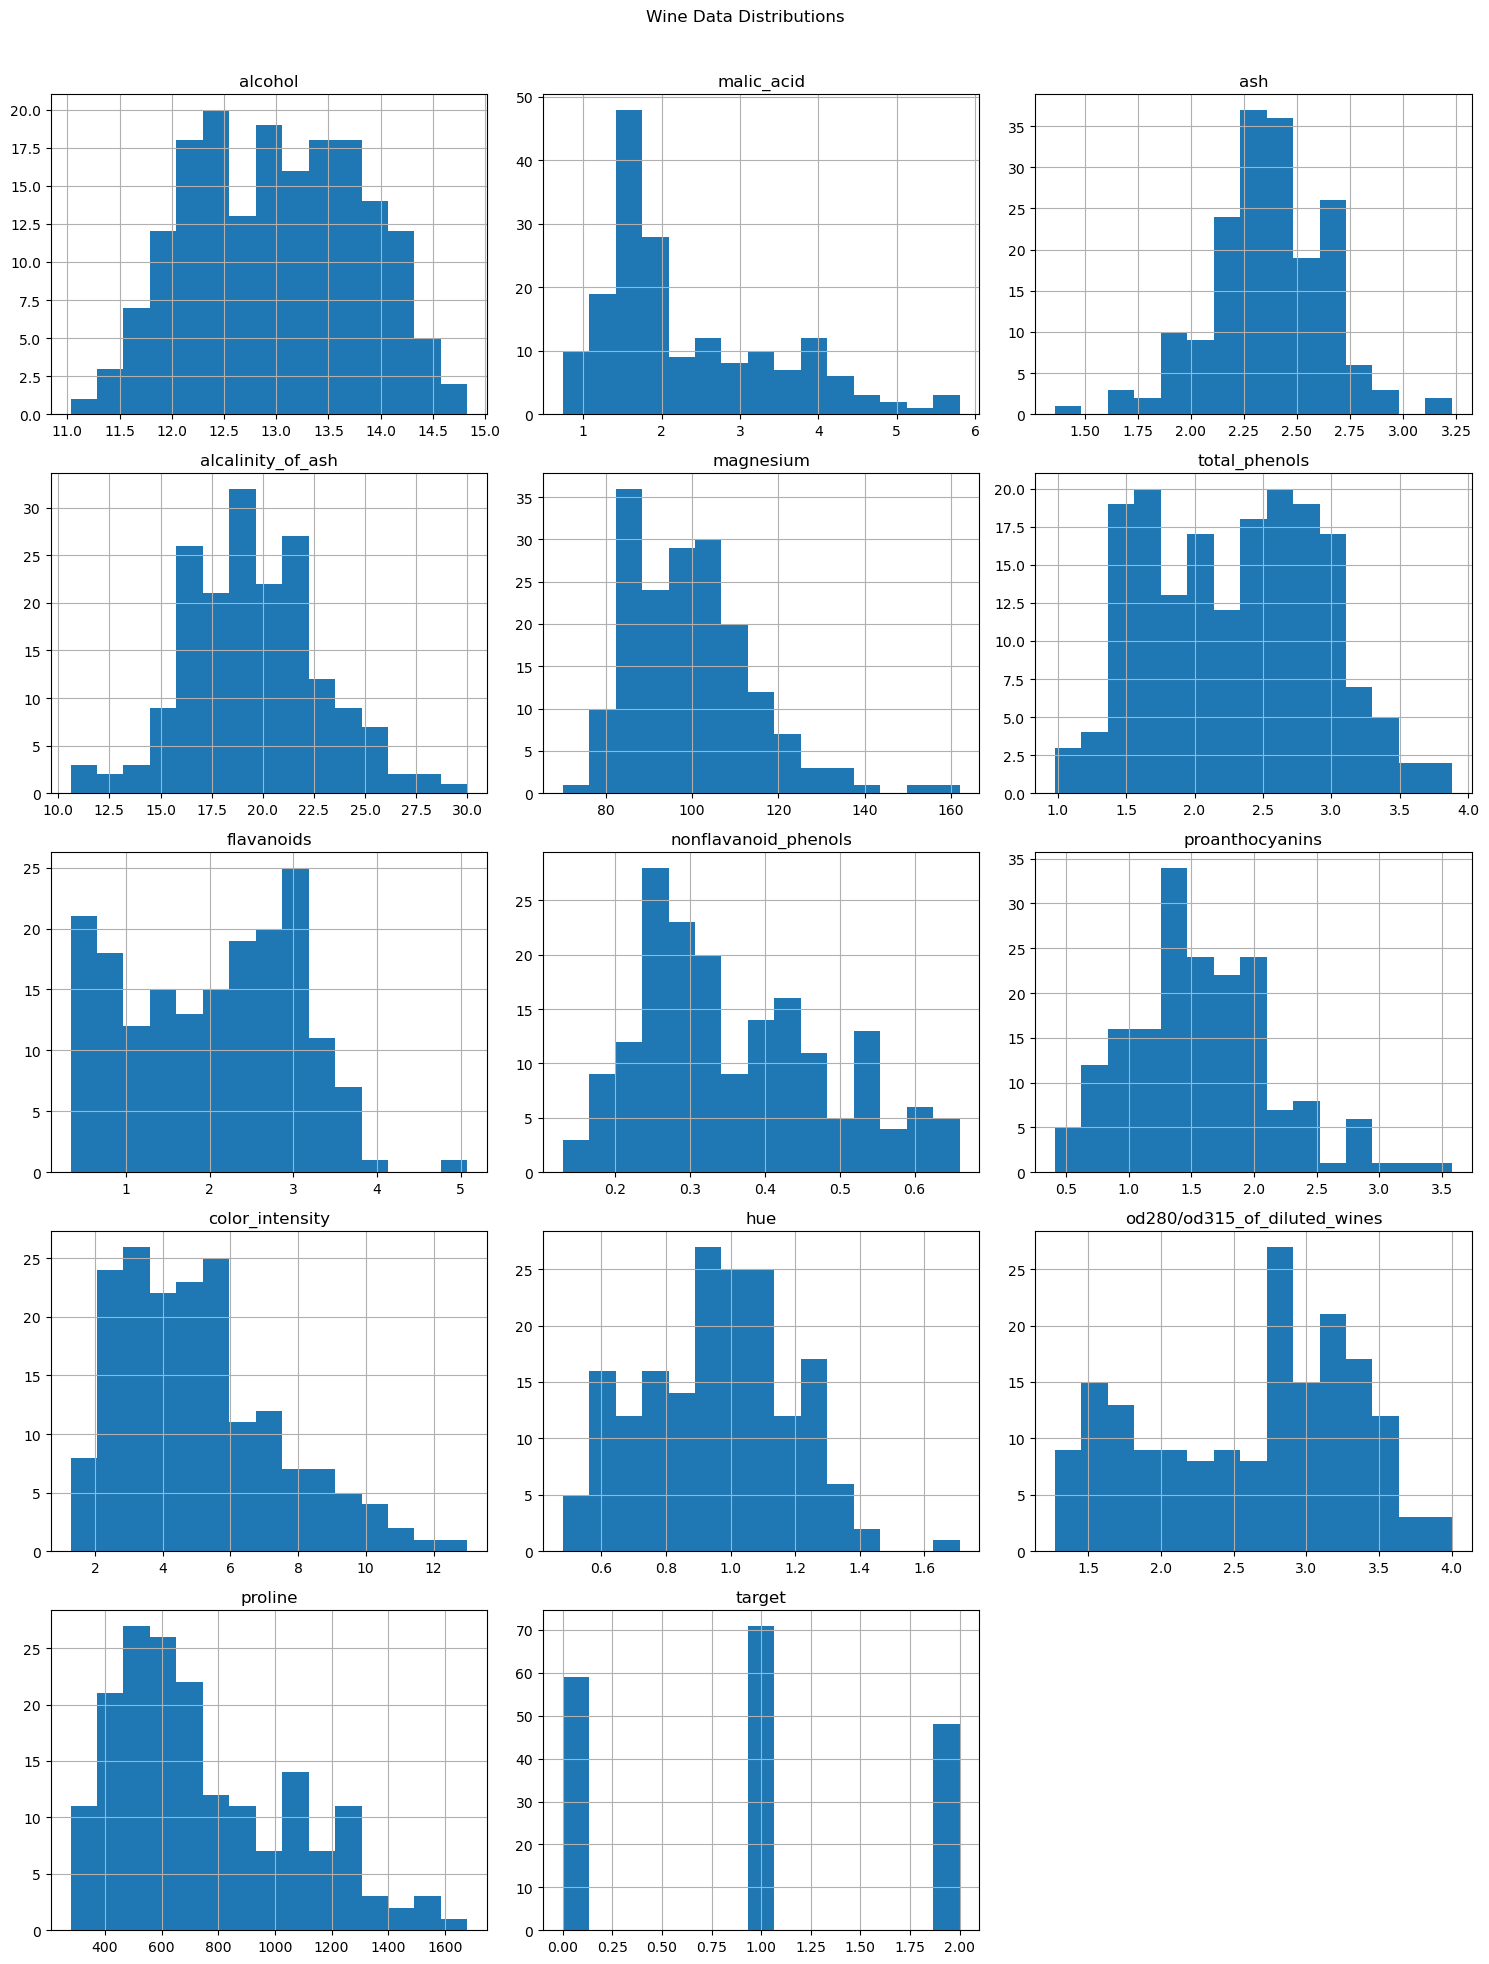

In [39]:
#Visualize the distributions of numerical features in each dataset.
def plot_distributions(df, title):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        df[col].hist(bins=15, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
plot_distributions(df_wine, "Wine Data Distributions")


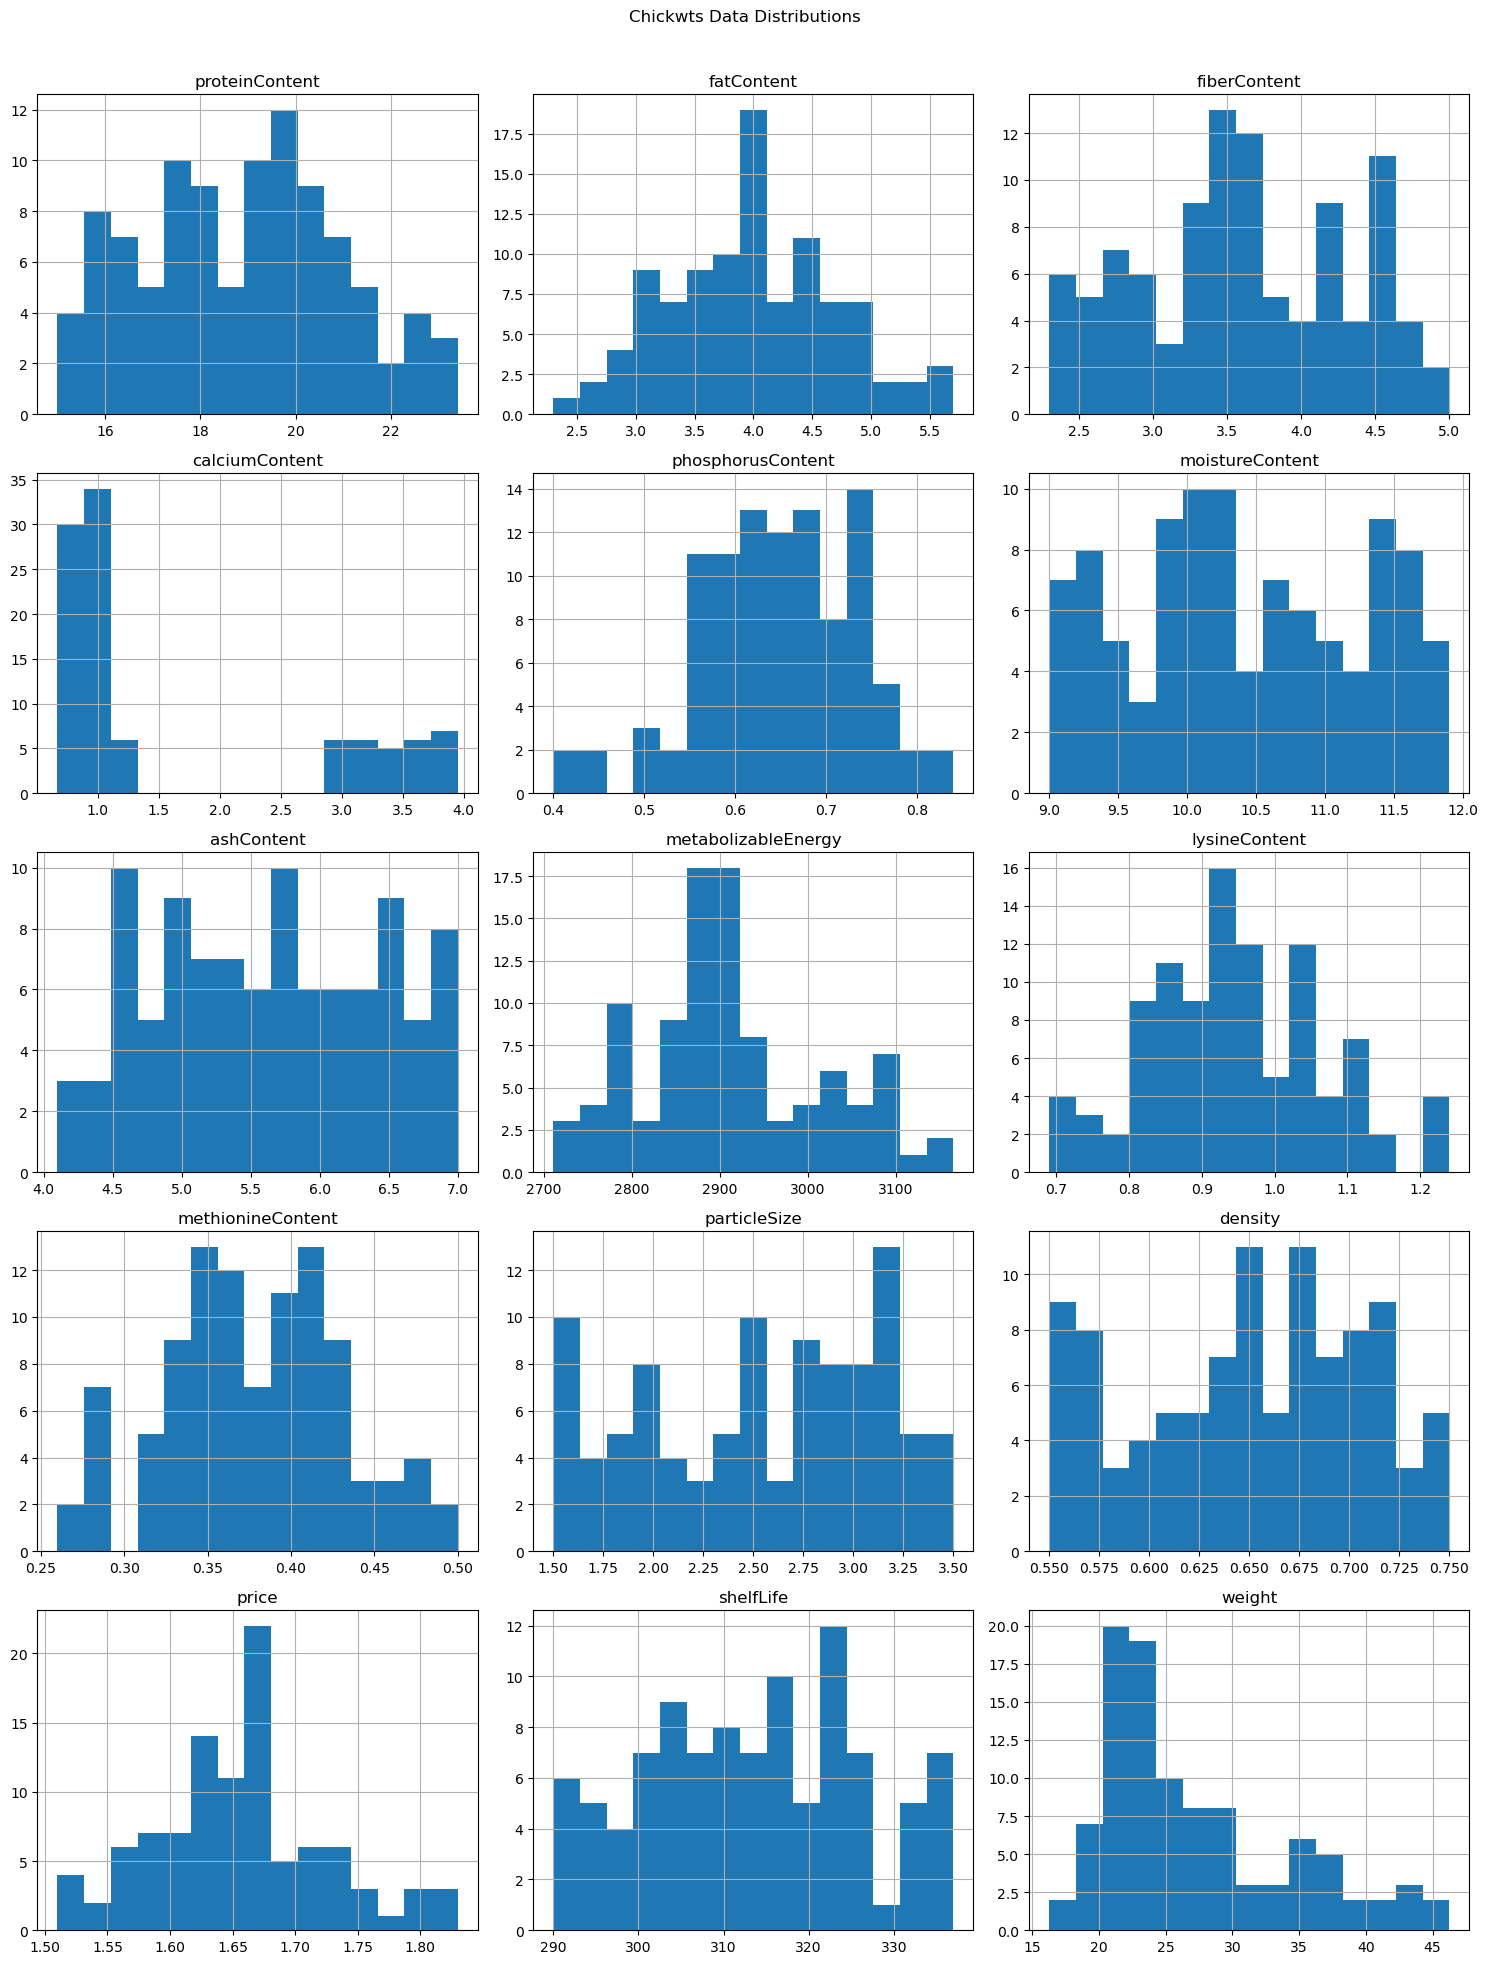

In [40]:
plot_distributions(df_chickwts, "Chickwts Data Distributions")

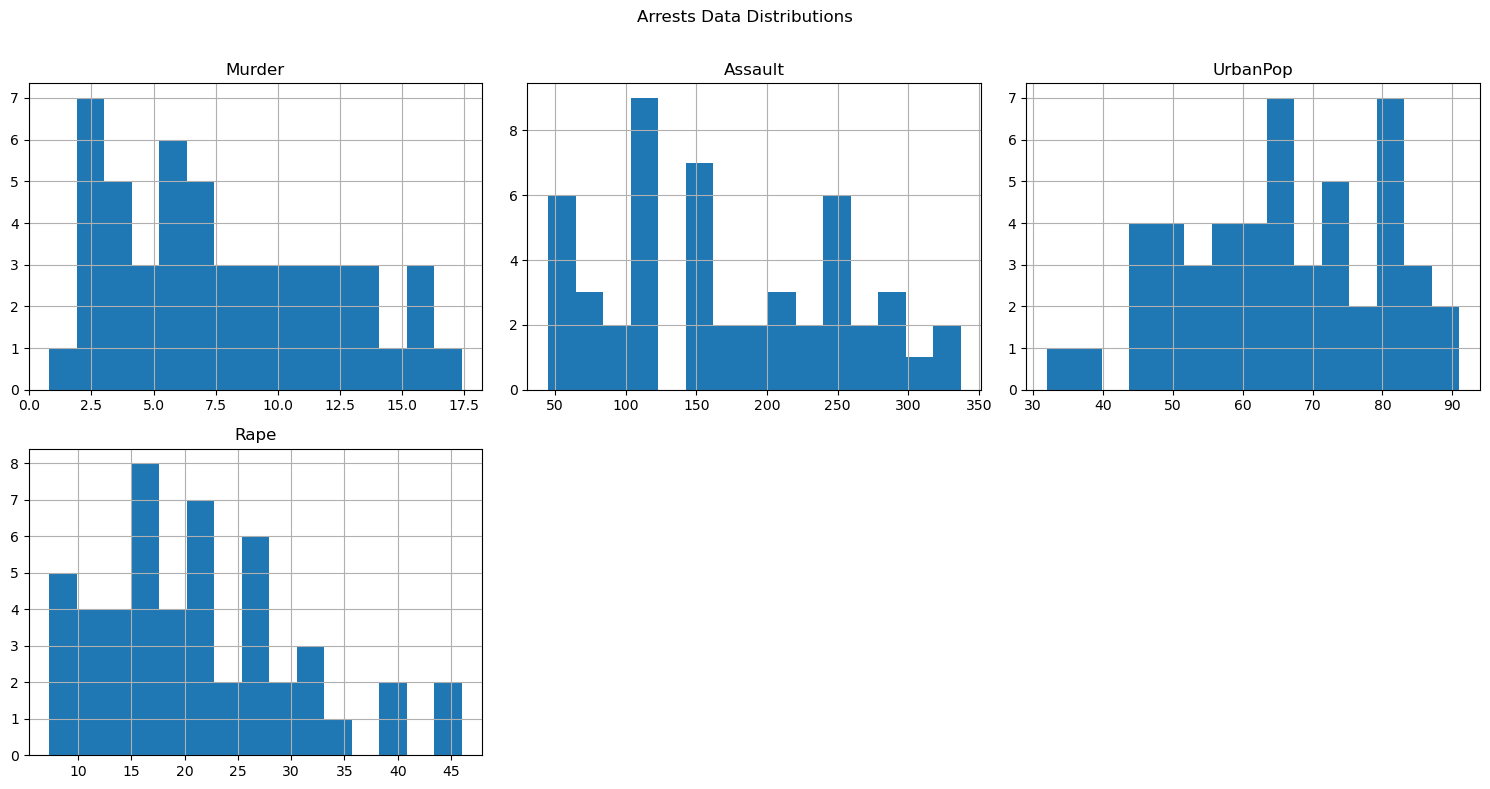

In [41]:
plot_distributions(df_arrests, "Arrests Data Distributions")

**Step 2: k-Nearest Neighbors (k-NN) Classification on the Wine Dataset**

**Use PCA and hyperparameter tuning to optimize k-NN classification.**

1. Convert categorical target labels into numeric values.
2. Apply PCA to reduce dimensionality while retaining 95% variance.
3. Use GridSearchCV to find the optimal k-value and distance metric.
4. Train the k-NN classifier using the best parameters.
5. Evaluate the model with a classification report and accuracy score.

In [42]:
#Convert categorical target labels for Wine Dataset into numeric values.
y_wine = df_wine['target'].astype('category').cat.codes
X_wine = df_wine.drop('target', axis=1)


#Standardize the Wine dataset features.
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

In [43]:
#Apply PCA to reduce dimensionality of the Wine dataset.
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
X_wine_pca = pca.fit_transform(X_wine_scaled)

n_components_retained = pca.n_components_
print(f"Number of PCA components retained: {n_components_retained}")

Number of PCA components retained: 10


In [44]:
#Use GridSearchCV to find the optimal k-value and distance metric.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_wine_pca, y_wine)

print("Best k:", grid_knn.best_params_['n_neighbors'])
print("Best metric:", grid_knn.best_params_['metric'])

Best k: 18
Best metric: euclidean


In [45]:
#Train the k-NN classifier using the best parameters.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(X_wine_pca, y_wine)


KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [46]:
#Evaluate the model with a classification report and accuracy score.
from sklearn.metrics import classification_report, accuracy_score
y_pred = knn.predict(X_wine_pca)
print("Classification Report:\n", classification_report(y_wine, y_pred))
print("Accuracy Score:", accuracy_score(y_wine, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.93      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.97      0.98      0.97       178
weighted avg       0.97      0.97      0.97       178

Accuracy Score: 0.9719101123595506


**Step 3: Build a Recommendation System Using the Chickwts Dataset**

**Use PCA and cosine similarity to suggest similar feeds.**

1. Standardize the weight feature for uniform scaling.
2. Apply PCA to reduce data to one principal component.
3. Compute cosine similarity between different feed types.
4. Recommend similar feeds based on similarity scores.

In [47]:
#Standardize the weight feature for uniform scaling.

# Select all numeric features (excluding feed_name)
numeric_cols = df_chickwts.select_dtypes(include='number').columns
df_numeric = df_chickwts[numeric_cols]

# Standardize all numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [48]:
#Apply PCA to reduce data to one principal component.
pca = PCA(n_components=1)
df_pca = pca.fit_transform(df_scaled)
df_chickwts['pca_1'] = df_pca
df_pca.shape


(100, 1)

In [49]:
#Compute cosine similarity between different feed types.
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df_pca)

In [50]:
#Recommend similar feeds based on similarity scores.
def recommend_similar_feeds(feed_name, top_n=5):
    feed_index = df_chickwts[df_chickwts['feed_name'] == feed_name].index[0]
    sim_scores = list(enumerate(cosine_sim[feed_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_feeds = [df_chickwts.iloc[i[0]]['feed_name'] for i in sim_scores[1:top_n+1]]
    return top_feeds

recommend_similar_feeds('ChickLaunch Pro', top_n=5)

['EarlyGrow Formula',
 'HatchMate Premier',
 'NestStart Gold',
 'FledglingBlend',
 'ChickBoost Complete']

**Step 4: Clustering (K-Means & GMM) on the USArrests Dataset**

**Identify clusters in crime data using feature selection and dimensionality reduction.**

1. Standardize the dataset for consistency.
2. Select the top 3 relevant features for clustering.
3. Apply PCA to reduce the dataset to 2 principal components.
4. Determine the optimal number of clusters:
    1. Use the elbow method (inertia) for K-Means.
    2. Use Bayesian Information Criterion (BIC) for GMM.
5. Apply clustering models:
    1. K-Means for hard cluster assignments.
    2. GMM for probabilistic clustering.
6. Visualize and compare clustering results.

In [51]:
#Standardize the dataset for consistency.
scaler = StandardScaler()
df_arrests_scaled = scaler.fit_transform(df_arrests.select_dtypes(include=[np.number]))

In [52]:
#Select the top 3 relevant features for clustering.
top_features = ['Murder', 'Assault', 'Rape']

In [53]:
#Apply PCA to reduce the dataset to 2 principal components.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_arrests_scaled)

c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

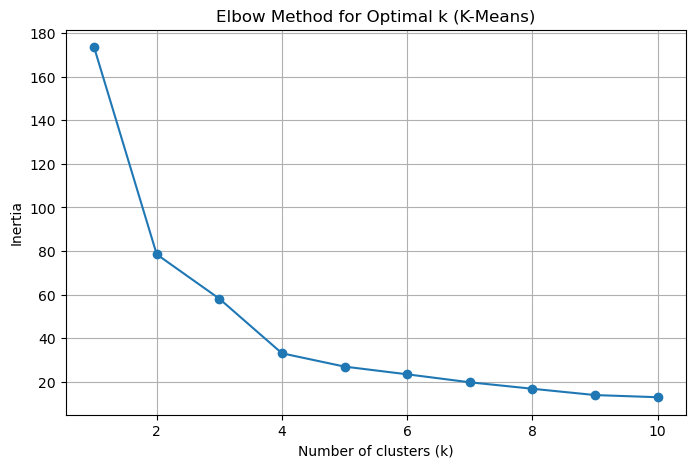

In [54]:
from sklearn.cluster import KMeans
#Determine the optimal number of clusters:
#Use the elbow method (inertia) for K-Means.
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

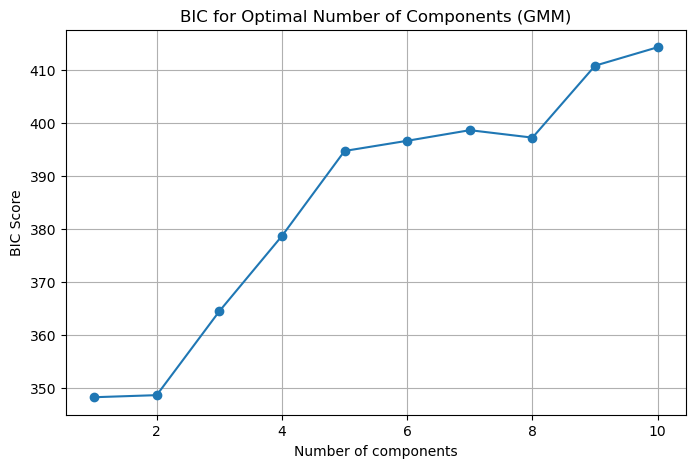

In [55]:
from sklearn.mixture import GaussianMixture
#Use Bayesian Information Criterion (BIC) for GMM.

# Fit GMM with different numbers of components and calculate BIC
bic_scores = []
n_components_range = range(1,11)

for n in n_components_range:
    gm = GaussianMixture(n_components=n,random_state=42)
    gm.fit(df_pca)
    bic_scores.append(gm.bic(df_pca))

# Plot the BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC for Optimal Number of Components (GMM)')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.grid(True)
plt.show()

In [56]:
#Apply clustering models:
#K-Means for hard cluster assignments.
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

df_pca['KMeans_Cluster'] = kmeans_labels

print(df_pca.head())

        PC1       PC2  KMeans_Cluster
0  0.985566 -1.133392               2
1  1.950138 -1.073213               2
2  1.763164  0.745957               1
3 -0.141420 -1.119797               2
4  2.523980  1.542934               1


c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
#GMM for probabilistic clustering.

#Fit GMM with optimal number of components (from BIC = 2)
gmm = GaussianMixture(n_components=2, random_state=42)

gmm_labels = gmm.fit_predict(df_pca[['PC1', 'PC2']])
gmm_probs = gmm.predict_proba(df_pca[['PC1', 'PC2']])

df_pca['GMM_Cluster'] = gmm_labels
df_pca['GMM_Prob'] = np.max(gmm_probs, axis=1)


# Print the first few rows of the DataFrame with GMM clusters
print(df_pca.head())

c:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        PC1       PC2  KMeans_Cluster  GMM_Cluster  GMM_Prob
0  0.985566 -1.133392               2            1  0.993154
1  1.950138 -1.073213               2            1  0.999839
2  1.763164  0.745957               1            1  0.969792
3 -0.141420 -1.119797               2            0  0.938099
4  2.523980  1.542934               1            1  0.991602


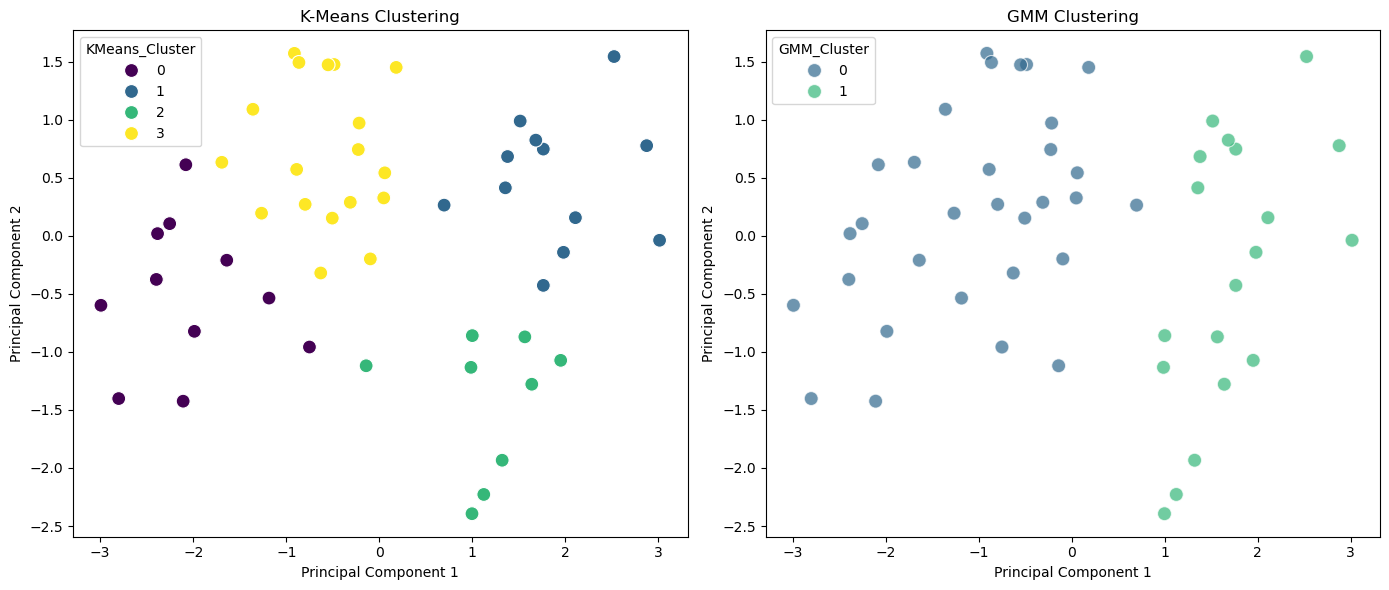

In [63]:
#Visualize and compare clustering results.

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means
sns.scatterplot(
    x='PC1', y='PC2', hue='KMeans_Cluster', data=df_pca,
    palette='viridis', ax=axes[0], s=100
)
axes[0].set_title("K-Means Clustering")

# GMM
sns.scatterplot(
    x='PC1', y='PC2', hue='GMM_Cluster', data=df_pca,
    palette='viridis', ax=axes[1], s=100, alpha=0.7
)
axes[1].set_title("GMM Clustering")

for ax in axes:
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()